In [74]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
# Investigacion de los generos de las peliculas
df = pd.read_csv('movie_statistic_dataset.csv')
df['genres'] = df['genres'].str.split(',')
unique_genres = df.explode('genres')['genres'].unique()
len(unique_genres)
unique_genres

array(['Action', 'Adventure', 'Fantasy', 'Drama', 'Sci-Fi', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Crime', 'Mystery', 'Western',
       'Romance', 'Musical', 'Horror', 'History', 'Biography',
       'Documentary', 'War', 'Sport', 'Music', 'Film-Noir', 'News'],
      dtype=object)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4378 non-null   object 
 1   production_date       4378 non-null   object 
 2   genres                4378 non-null   object 
 3   runtime_minutes       4378 non-null   float64
 4   director_name         4378 non-null   object 
 5   director_professions  4378 non-null   object 
 6   director_birthYear    4378 non-null   object 
 7   director_deathYear    4378 non-null   object 
 8   movie_averageRating   4378 non-null   float64
 9   movie_numerOfVotes    4378 non-null   float64
 10  approval_Index        4378 non-null   float64
 11  Production budget $   4378 non-null   int64  
 12  Domestic gross $      4378 non-null   int64  
 13  Worldwide gross $     4378 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.0+ KB


In [77]:
df_copy = df[['runtime_minutes', 'Production budget $']].copy()
df_genres = pd.get_dummies(df.explode('genres')['genres']).groupby(level=0).sum()
df_final = pd.concat([df_copy, df_genres], axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   runtime_minutes      4378 non-null   float64
 1   Production budget $  4378 non-null   int64  
 2   Action               4378 non-null   uint8  
 3   Adventure            4378 non-null   uint8  
 4   Animation            4378 non-null   uint8  
 5   Biography            4378 non-null   uint8  
 6   Comedy               4378 non-null   uint8  
 7   Crime                4378 non-null   uint8  
 8   Documentary          4378 non-null   uint8  
 9   Drama                4378 non-null   uint8  
 10  Family               4378 non-null   uint8  
 11  Fantasy              4378 non-null   uint8  
 12  Film-Noir            4378 non-null   uint8  
 13  History              4378 non-null   uint8  
 14  Horror               4378 non-null   uint8  
 15  Music                4378 non-null   u

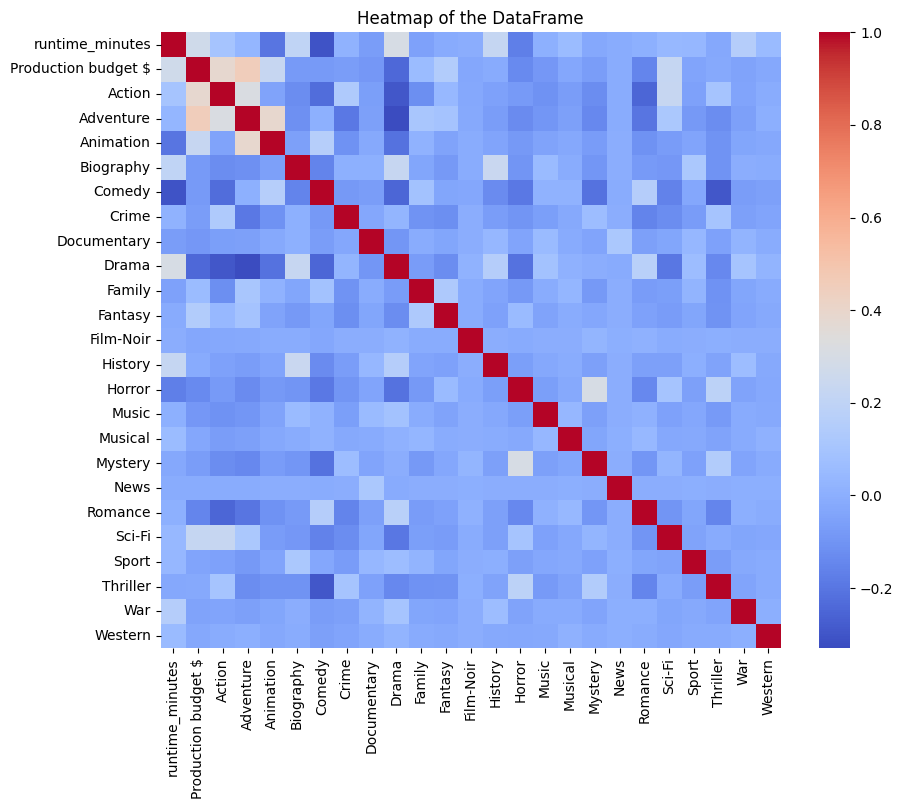

In [78]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(), cmap='coolwarm')
plt.title('Heatmap of the DataFrame')
plt.show()

In [79]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4378 entries, 0 to 4377
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   runtime_minutes      4378 non-null   float64
 1   Production budget $  4378 non-null   int64  
 2   Action               4378 non-null   uint8  
 3   Adventure            4378 non-null   uint8  
 4   Animation            4378 non-null   uint8  
 5   Biography            4378 non-null   uint8  
 6   Comedy               4378 non-null   uint8  
 7   Crime                4378 non-null   uint8  
 8   Documentary          4378 non-null   uint8  
 9   Drama                4378 non-null   uint8  
 10  Family               4378 non-null   uint8  
 11  Fantasy              4378 non-null   uint8  
 12  Film-Noir            4378 non-null   uint8  
 13  History              4378 non-null   uint8  
 14  Horror               4378 non-null   uint8  
 15  Music                4378 non-null   u

In [80]:
df_final.columns

Index(['runtime_minutes', 'Production budget $', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [81]:
X = df_final[['runtime_minutes', 'Production budget $']].values
Y = df_final.drop(['runtime_minutes', 'Production budget $'], axis=1)
X, Y = np.asarray(X), np.asarray(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_test, Y_train, Y_test

(array([[1.10e+02, 3.00e+06],
        [1.15e+02, 3.50e+07],
        [1.24e+02, 2.00e+07],
        ...,
        [1.17e+02, 1.10e+07],
        [1.36e+02, 4.50e+06],
        [1.15e+02, 6.00e+07]]),
 array([[1.38e+02, 1.50e+08],
        [1.13e+02, 8.80e+07],
        [1.03e+02, 1.80e+07],
        ...,
        [7.70e+01, 2.20e+07],
        [1.09e+02, 3.10e+07],
        [9.00e+01, 3.80e+07]]),
 array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 0, 0, 0]], dtype=uint8))

In [82]:
keras = tf.keras

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
batched_model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(2,), activation="softmax"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='linear'),
        keras.layers.BatchNormalization(),

    keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='softmax'),
        keras.layers.BatchNormalization(),

    keras.layers.Dense(23, activation='sigmoid')
]);

In [136]:
batched_model.compile(
    loss='mean_squared_error', 
    metrics=['accuracy']
)

In [137]:
batched_history =  batched_model.fit(
    X_train, 
    Y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=60, 
    verbose=2,
    validation_data=(X_test, Y_test)
)

Epoch 1/200
59/59 - 3s - loss: 0.2208 - accuracy: 0.2981 - val_loss: 0.1937 - val_accuracy: 0.1530 - 3s/epoch - 45ms/step
Epoch 2/200
59/59 - 0s - loss: 0.1520 - accuracy: 0.3575 - val_loss: 0.1243 - val_accuracy: 0.1530 - 228ms/epoch - 4ms/step
Epoch 3/200
59/59 - 0s - loss: 0.0972 - accuracy: 0.3415 - val_loss: 0.0928 - val_accuracy: 0.1530 - 262ms/epoch - 4ms/step
Epoch 4/200
59/59 - 0s - loss: 0.0785 - accuracy: 0.3412 - val_loss: 0.0870 - val_accuracy: 0.1530 - 266ms/epoch - 5ms/step
Epoch 5/200
59/59 - 0s - loss: 0.0754 - accuracy: 0.3370 - val_loss: 0.0862 - val_accuracy: 0.1530 - 225ms/epoch - 4ms/step
Epoch 6/200
59/59 - 0s - loss: 0.0746 - accuracy: 0.3398 - val_loss: 0.0858 - val_accuracy: 0.1530 - 230ms/epoch - 4ms/step
Epoch 7/200
59/59 - 0s - loss: 0.0746 - accuracy: 0.3407 - val_loss: 0.0849 - val_accuracy: 0.1530 - 240ms/epoch - 4ms/step
Epoch 8/200
59/59 - 0s - loss: 0.0743 - accuracy: 0.3384 - val_loss: 0.0838 - val_accuracy: 0.1701 - 235ms/epoch - 4ms/step
Epoch 9/20

In [131]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

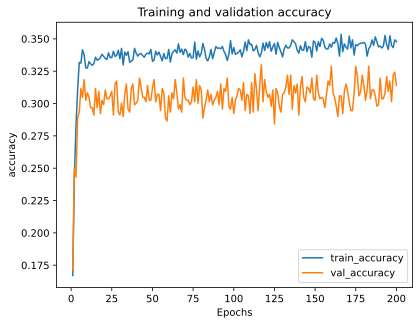

In [132]:
plot_metric(batched_history, 'accuracy')

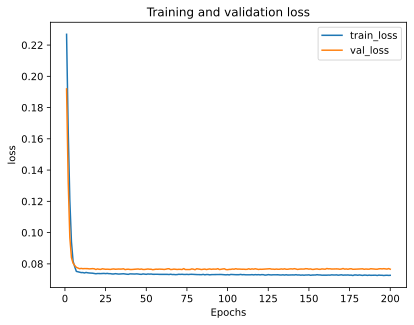

In [133]:
plot_metric(batched_history, 'loss')

In [134]:
batched_model.evaluate(X_test, Y_test, verbose=2)

28/28 - 0s - loss: 0.0766 - accuracy: 0.3139 - 61ms/epoch - 2ms/step


[0.07657212764024734, 0.31392693519592285]